## Data Visualisation Pre Cleaning 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

df_uncleaned = pd.read_csv("/work/Hotel_Reviews.csv");
df = pd.read_csv("/work/Hotel_Reviews.csv");

Things to do: 

1. Average score vs Hotel Name -> Average score by hotel name

undefined. is_bad_review distribution

undefined. Word Cloud on reviews to identify key words in reviews

4. Review_Date vs Average Score -> general trend to see if the average reviews are increase or decreasing'

undefined. Barplot of Reviewer_Nationality --> identify primary travelers

undefined. Barplot of Hotel_Name --> identify all hotel percentage included in the review

undefined. Reviewer_Score vs Average_Score (hotel) --> give idea if the  shitty reviewer score, lower average score... maybe just shitty people 

Suggestion for cleaning: 

Might want to split up Tags in the different categories. 

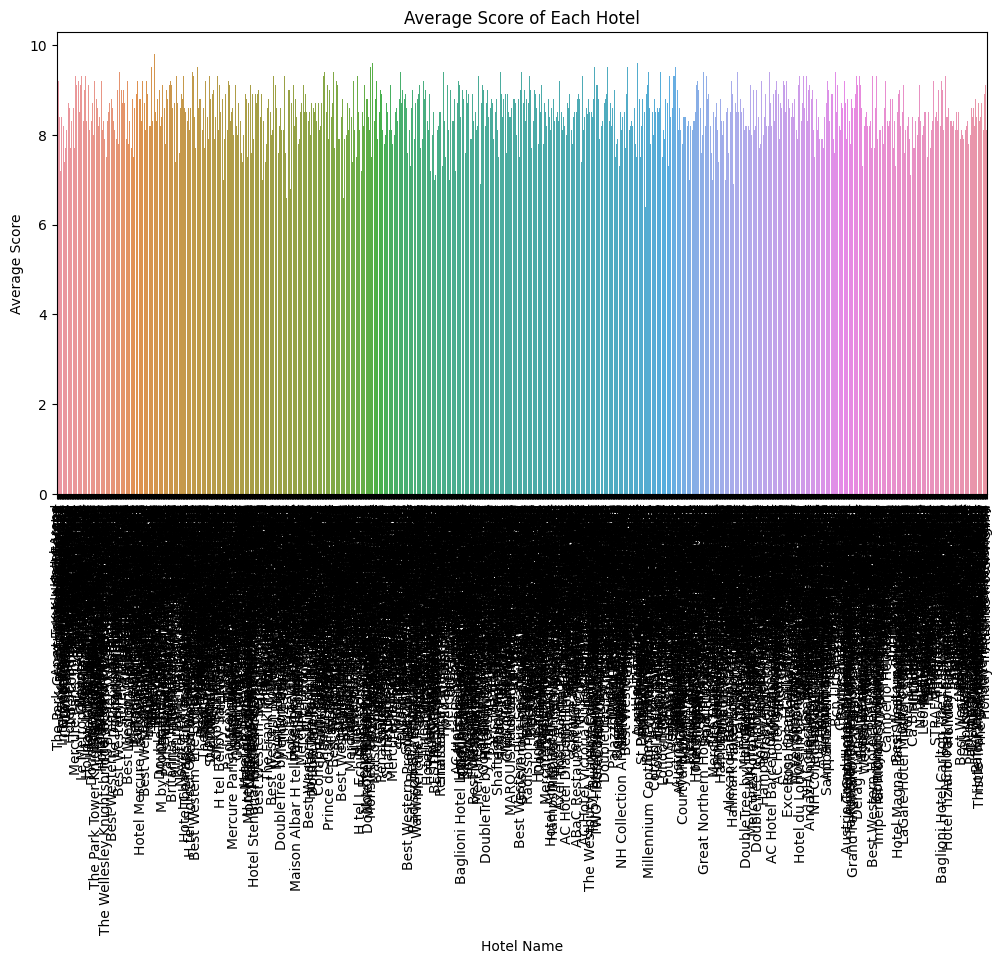

In [2]:
# Bar chart using Seaborn
plt.figure(figsize=(12, 6))

sns.barplot(x='Hotel_Name', y='Average_Score', data=df)
plt.xticks(rotation=90)
plt.xlabel('Hotel Name')
plt.ylabel('Average Score')
plt.title('Average Score of Each Hotel')
plt.show()

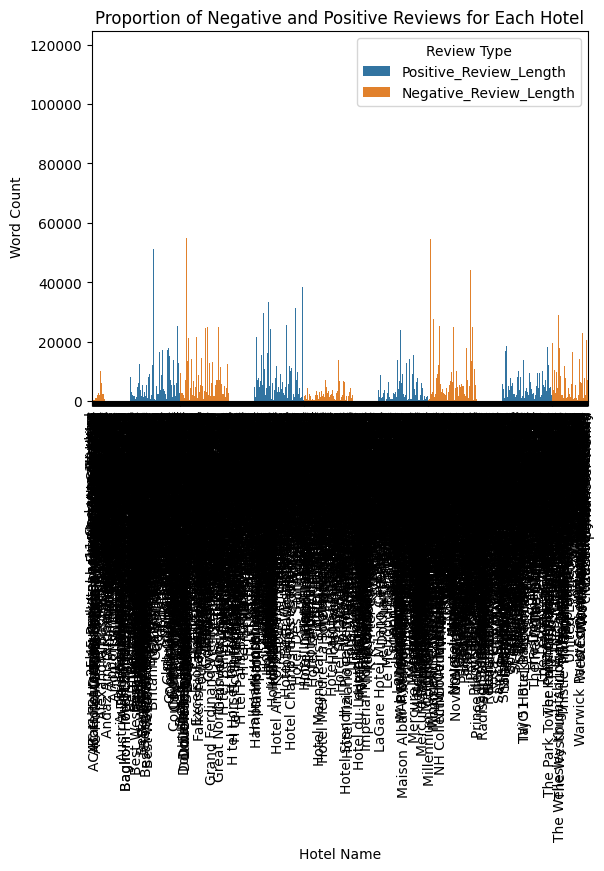

In [3]:
# Stacked bar chart using Seaborn
df['Positive_Review_Length'] = df['Positive_Review'].apply(lambda x: len(x.split()))
df['Negative_Review_Length'] = df['Negative_Review'].apply(lambda x: len(x.split()))
df_stacked = df.groupby('Hotel_Name')[['Positive_Review_Length', 'Negative_Review_Length']].sum().reset_index()
df_stacked = df_stacked.melt(id_vars='Hotel_Name', var_name='Review Type', value_name='Word Count')
sns.barplot(x='Hotel_Name', y='Word Count', hue='Review Type', data=df_stacked)
plt.xticks(rotation=90)
plt.xlabel('Hotel Name')
plt.ylabel('Word Count')
plt.title('Proportion of Negative and Positive Reviews for Each Hotel')
plt.show()

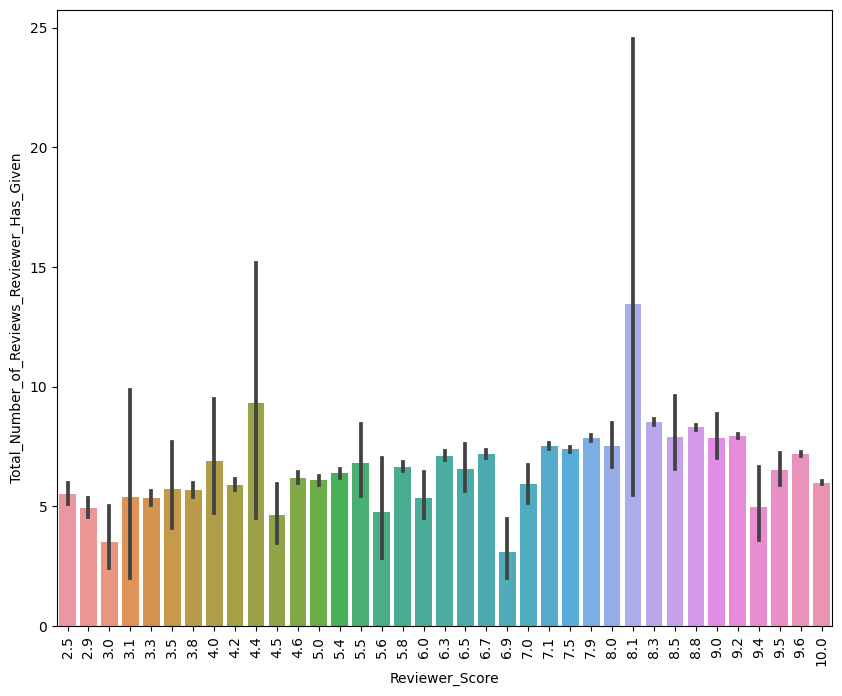

In [4]:
# Waterfall chart
plt.figure(figsize=(10,8))
sns.barplot(x='Reviewer_Score', y='Total_Number_of_Reviews_Reviewer_Has_Given', data=df)
plt.xticks(rotation=90)
plt.show()

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


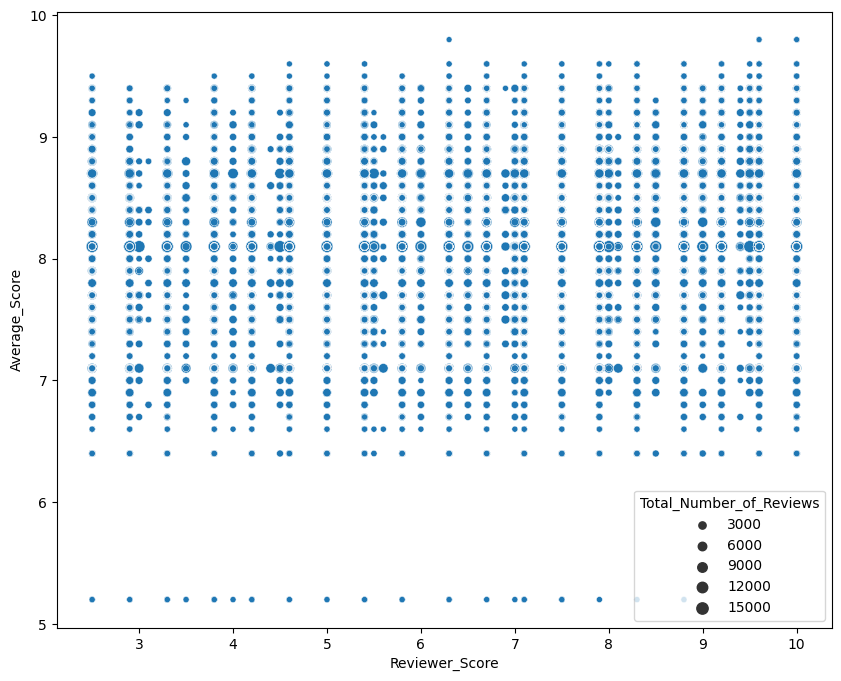

In [5]:
# Bubble chart
plt.figure(figsize=(10,8))
sns.scatterplot(x='Reviewer_Score', y='Average_Score', size='Total_Number_of_Reviews', data=df)
plt.show()

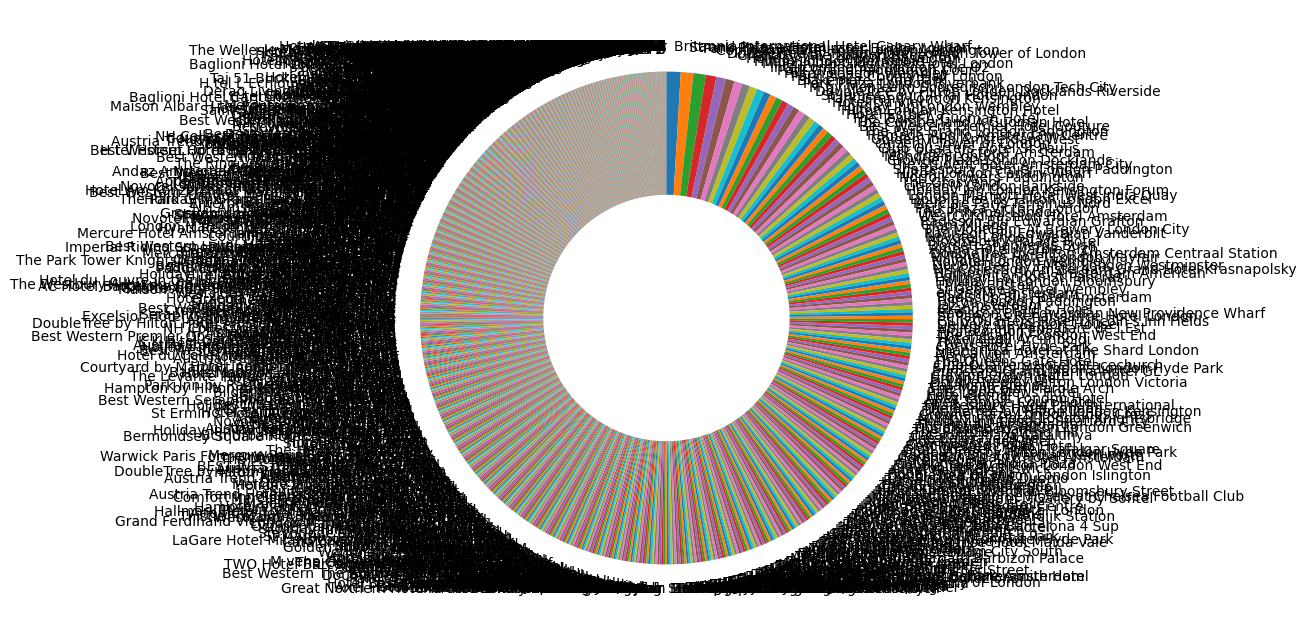

In [6]:
# Sunburst chart
plt.figure(figsize=(10,8))
df['Hotel_Name'].value_counts().plot.pie(subplots=True, wedgeprops=dict(width=0.5), textprops=dict(size=10), startangle=90, counterclock=False)
plt.show()

In [9]:
!pip install wordcloud==1.8.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 KB 34.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


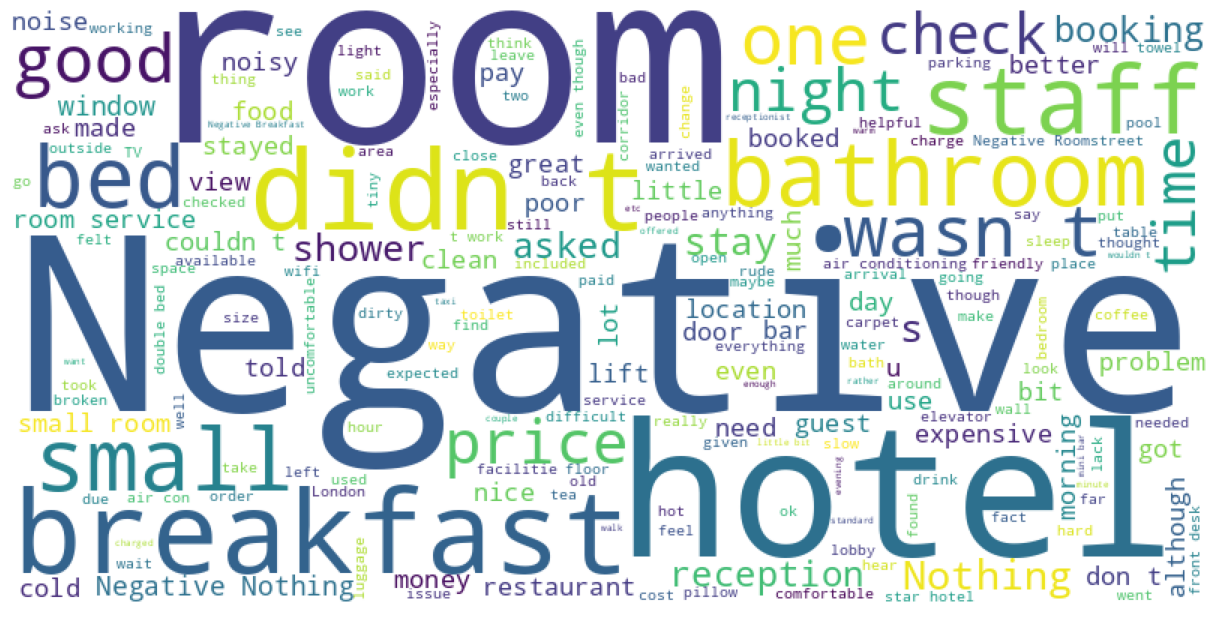

In [10]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time


from wordcloud import WordCloud
df = pd.read_csv("/work/Hotel_Reviews.csv");
neg_words = ' '.join(df['Negative_Review'].values.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neg_words)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

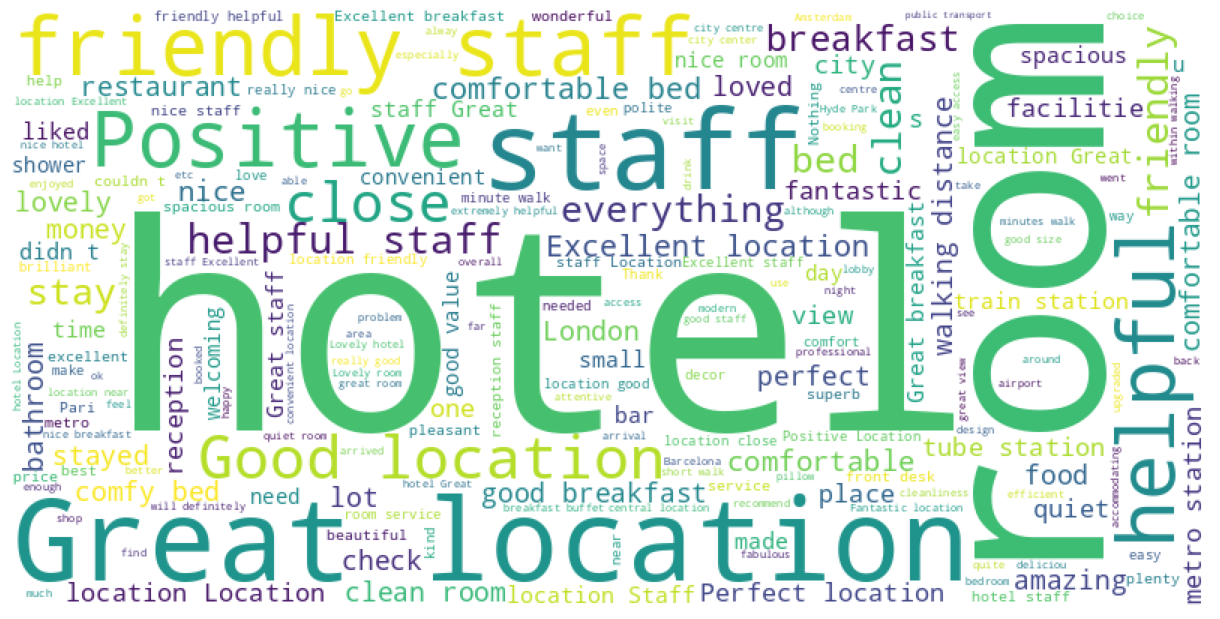

In [11]:
df = pd.read_csv("/work/Hotel_Reviews.csv");
pos_word = ' '.join(df['Positive_Review'].values.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_word)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



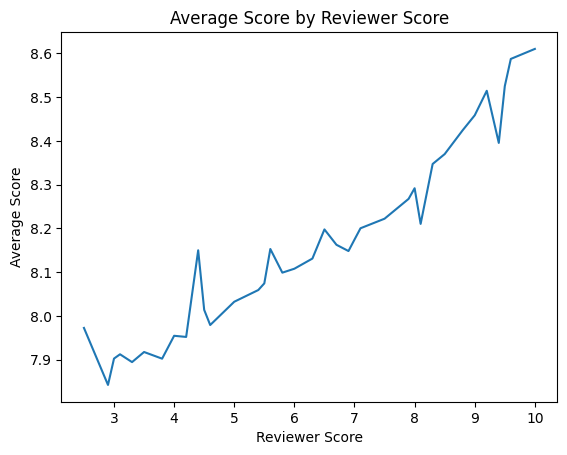

In [12]:
avg_scores = df.groupby('Reviewer_Score')['Average_Score'].mean()

# Create the line chart
plt.plot(avg_scores.index, avg_scores.values)
plt.xlabel('Reviewer Score')
plt.ylabel('Average Score')
plt.title('Average Score by Reviewer Score')
plt.show()

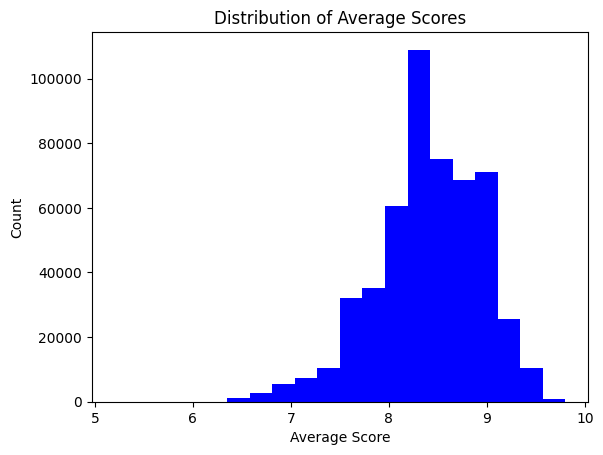

In [13]:
# Create the histogram
plt.hist(df['Average_Score'], bins=20, color='blue')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.title('Distribution of Average Scores')
plt.show()

In [14]:


# Get the top 10 reviewed hotels by count of total reviews
top_hotels = df['Hotel_Name'].value_counts().nlargest(10)

# Print the top 10 hotels and their review counts
print('Top 10 Reviewed Hotels:')
print(top_hotels)



Top 10 Reviewed Hotels:
Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Name: Hotel_Name, dtype: int64


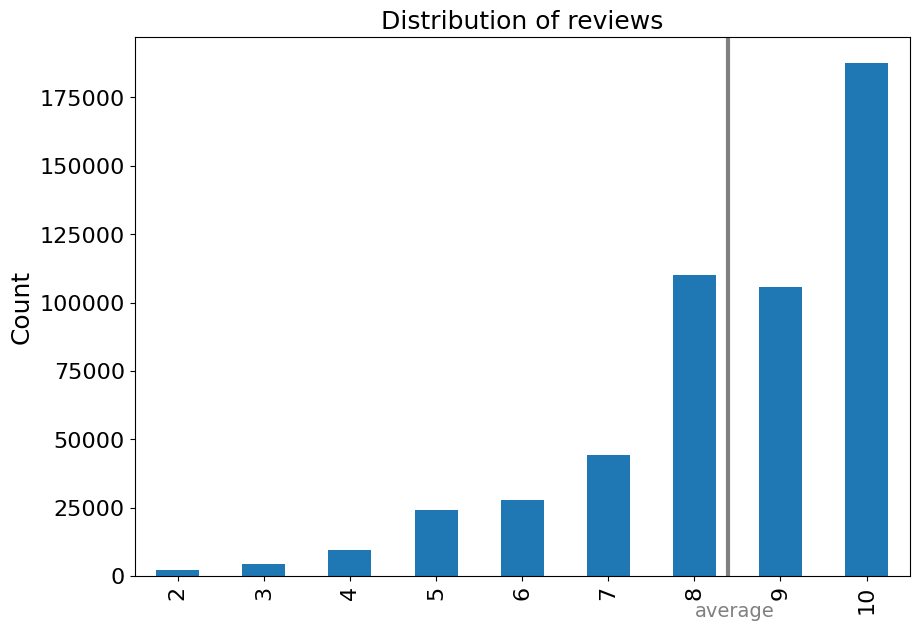

In [15]:
# Create a column with the rounded reviews
df["Reviewer_Score_Round"] = df["Reviewer_Score"].apply(lambda x: int(round(x)))

# Get the number of reviews with which scores
reviews_dist = df["Reviewer_Score_Round"].value_counts().sort_index()
bar = reviews_dist.plot.bar(figsize =(10,7))
plt.title("Distribution of reviews", fontsize = 18)
plt.axvline(df["Reviewer_Score"].mean()-2, 0 ,1, color = "grey", lw = 3)
plt.text(6, -15000, "average", fontsize = 14, color = "grey")
plt.ylabel("Count", fontsize = 18)
bar.tick_params(labelsize=16)

# Remove the column "Reviewer_Score_Round"
df.drop("Reviewer_Score_Round", axis = 1, inplace = True)

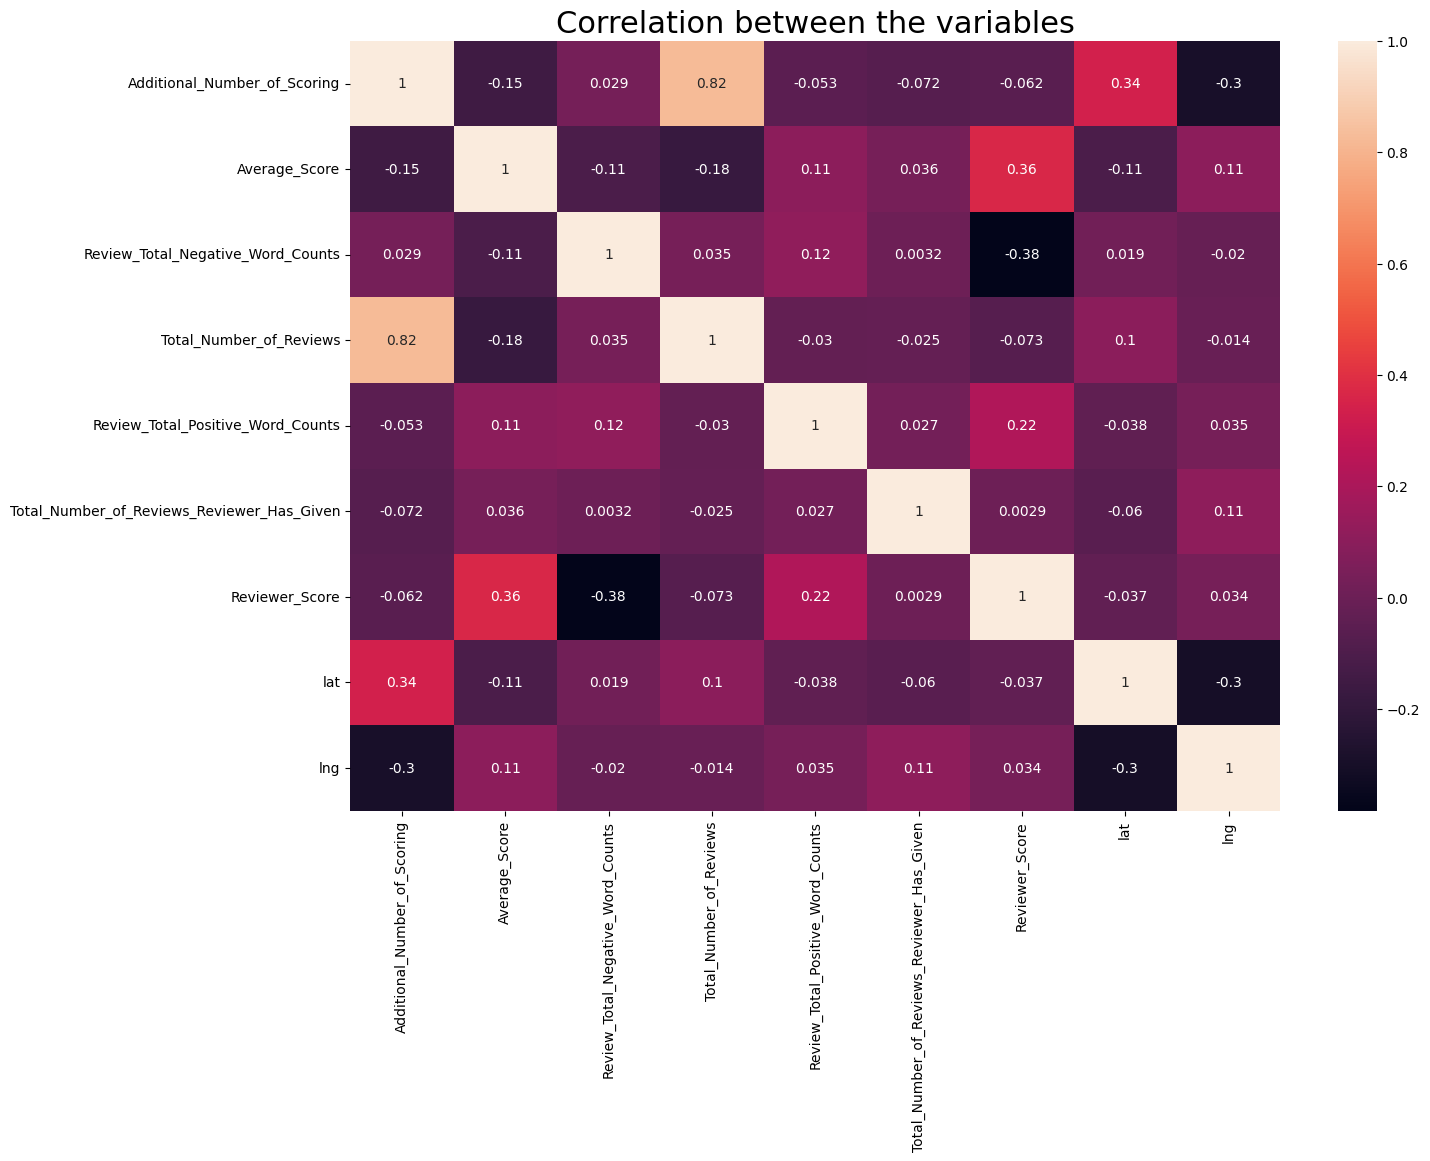

In [16]:
# Correlation
df_corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot = True)
plt.title("Correlation between the variables", fontsize = 22)
plt.show()

In [17]:
# Compute the difference between the highest and lowest average score for each hotel
hotel_diff = df.groupby('Hotel_Name')['Average_Score'].apply(lambda x: x.max() - x.min())

# Get the top 10 hotels with the largest difference in average score
top_hotels = hotel_diff.nlargest(10)

# Print the top 10 hotels and their score differences
print('Top 10 Hotels with the Most Decrease in Average Score:')
print(top_hotels)

Top 10 Hotels with the Most Decrease in Average Score:
Hotel_Name
Hotel Regina                                    0.1
11 Cadogan Gardens                              0.0
1K Hotel                                        0.0
25hours Hotel beim MuseumsQuartier              0.0
41                                              0.0
45 Park Lane Dorchester Collection              0.0
88 Studios                                      0.0
9Hotel Republique                               0.0
A La Villa Madame                               0.0
ABaC Restaurant Hotel Barcelona GL Monumento    0.0
Name: Average_Score, dtype: float64


In [18]:
df = pd.read_csv("/work/Hotel_Reviews.csv");
# Split the Tags column by commas and remove square brackets and single quotes
tags_split = df['Tags'].str.replace('[\[\]\']', '').str.split(',', expand=True).apply(lambda x: x.str.strip())

# Rename the columns to include the tag number
tags_split.columns = ['Tag_' + str(col) for col in tags_split.columns]

# Concatenate the new columns to the original DataFrame
df = pd.concat([df, tags_split], axis=1)

# Save the updated DataFrame to a new CSV file
df.to_csv('data_with_tags.csv', index=False)

/tmp/ipykernel_222/2184194014.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tags_split = df['Tags'].str.replace('[\[\]\']', '').str.split(',', expand=True).apply(lambda x: x.str.strip())


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea4e772d-4daa-4712-9df2-11ccbdb38015' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>